In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

def show(mean, sample):
    dims = len(mean)
    plt.plot([0] * dims, "black", ls=('dashed'))
    plt.plot(mean, "o")
    for i in range(len(sample)):
        plt.plot(sample[i])
    plt.show()
    
sample_shape = (10,)

"""
mean = np.array([0,0,0,0])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])
sample = multivariate_normal(mean, cov, sample_shape)

show(mean, sample)
"""

'\nmean = np.array([0,0,0,0])\ncov = np.array(\n    [\n     [1, .7, .5, .3],\n     [.7, 1, .7, .5],\n     [.5, .7, 1, .7],\n     [.3, .5, .7, 1]\n     ])\nsample = multivariate_normal(mean, cov, sample_shape)\n\nshow(mean, sample)\n'

In [2]:
from copy import deepcopy

def fix_mean_and_sample(mean, sample, pos, value):
    mean = np.insert(mean, pos, value)
    sample = np.insert(sample, pos, value, axis = 1)
    return(mean, sample)

def fix_multiple(mean, sample, pos_value_dict):
    pos_value_dict = deepcopy(pos_value_dict)
    if(len(pos_value_dict) == 1):
        for pos, value in pos_value_dict.items():
            return(fix_mean_and_sample(mean, sample, pos, value))
    else:
        pos = min(k for k, v in pos_value_dict.items())
        value = pos_value_dict[pos]
        mean, sample = fix_mean_and_sample(mean, sample, pos, value)
        del pos_value_dict[pos]
        return(fix_multiple(mean, sample, pos_value_dict))

"""
mean = np.array([0,1,2,3])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])

print("First:")
print(mean)
print(sample)

pos = 2
value = -1
mean = np.hstack([mean[:pos], mean[pos+1:]])
sample = np.hstack([sample[:,:pos], sample[:,pos+1:]])

print("\nConstrained:")
print(mean)
print(sample)

mean, sample = fix_mean_and_sample(mean, sample, pos, value)

print("\nFixed:")
print(mean)
print(sample)
"""

'\nmean = np.array([0,1,2,3])\ncov = np.array(\n    [\n     [1, .7, .5, .3],\n     [.7, 1, .7, .5],\n     [.5, .7, 1, .7],\n     [.3, .5, .7, 1]\n     ])\n\nprint("First:")\nprint(mean)\nprint(sample)\n\npos = 2\nvalue = -1\nmean = np.hstack([mean[:pos], mean[pos+1:]])\nsample = np.hstack([sample[:,:pos], sample[:,pos+1:]])\n\nprint("\nConstrained:")\nprint(mean)\nprint(sample)\n\nmean, sample = fix_mean_and_sample(mean, sample, pos, value)\n\nprint("\nFixed:")\nprint(mean)\nprint(sample)\n'

Mean:
[0 0].

Covariance:
[[1.  0.7]
 [0.7 1. ]].

Samples:
[[-1.03886618 -1.09476206]
 [-0.31375786 -0.93716635]
 [ 1.67431077  0.32004374]
 [ 0.86116144 -0.58112992]
 [ 0.39754063  0.516605  ]
 [ 0.570477    0.90821681]
 [ 0.23643311 -0.27645037]
 [ 0.06031581 -0.98069413]
 [-1.63473366 -0.17269456]
 [ 0.99856405 -0.12783418]].


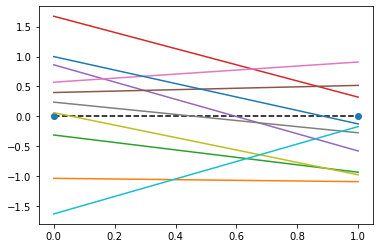


What's the second variable if the first variable is 0.5?

Mean after:
[0.35].

Cov after:
[[0.51]].

Samples:
[[ 0.78013105]
 [-0.0709672 ]
 [-1.09424367]
 [ 0.72512415]
 [ 0.59868921]
 [ 0.8922221 ]
 [-0.5722702 ]
 [ 2.25323306]
 [-0.12025177]
 [-0.78309757]].


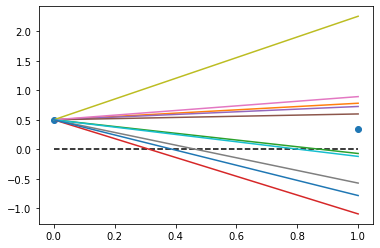

In [3]:
mean = np.array([0,0])
cov = np.array([[1, .7],[.7, 1]])
sample = multivariate_normal(mean, cov, sample_shape)

print("Mean:\n{}.\n\nCovariance:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))
show(mean, sample)

x_0 = .5
print("\nWhat's the second variable if the first variable is {}?".format(x_0))

mean = np.array([mean[1] + (cov[0,1] / cov[0,0]) * (x_0 - mean[0])])
cov = np.array([[cov[1,1] - (cov[1,0] / cov[0,0]) * cov[0,1]]])
sample = multivariate_normal(mean, cov, sample_shape)

print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))

mean, sample = fix_mean_and_sample(mean, sample, 0, x_0)
show(mean, sample)

Now let's work in higher dimensions!
Mean:
[0 0 0 0].

Covariance:
[[1.  0.7 0.5 0.3]
 [0.7 1.  0.7 0.5]
 [0.5 0.7 1.  0.7]
 [0.3 0.5 0.7 1. ]].

Samples:
[[ 4.70732472e-01  7.62270553e-01  1.43504390e-03 -2.29934700e-01]
 [-8.00249127e-01 -1.03642911e+00 -1.52626494e+00 -1.88505288e+00]
 [-3.63411503e-01  5.61904950e-01  1.11114392e+00  2.54813005e+00]
 [ 1.17848187e+00  2.03676468e-01 -4.13450829e-01 -8.46939491e-01]
 [-1.08614066e+00 -1.00176987e+00 -5.53814736e-02  2.45377084e-01]
 [ 4.18713632e-01  1.11927511e+00  1.56808874e+00  2.16493107e-01]
 [-2.67076923e-01 -6.55654572e-01 -5.34307384e-01 -8.43526486e-01]
 [-1.80073154e+00 -1.45445092e+00 -9.10564331e-01 -2.25742129e+00]
 [-1.39859976e+00 -1.32264225e+00 -6.48571128e-01  7.58932946e-01]
 [-2.90139764e-01 -9.20863992e-01 -4.33221364e-01  1.46417851e+00]].


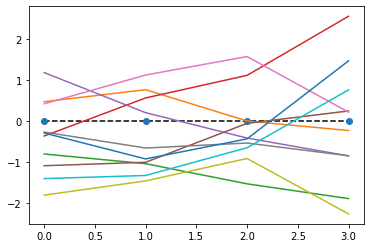


What if variable 3 is 1?

Mean after:
[0.5 0.7 0.7].

Cov after:
[[ 0.75  0.35 -0.05]
 [ 0.35  0.51  0.01]
 [-0.05  0.01  0.51]].

Samples:
[[-0.39113348  0.01748496  0.65907996]
 [ 1.01272174  1.44461196  0.40794269]
 [ 1.51290007  0.77644331  1.30142481]
 [-0.15633832  0.31106088  0.65893304]
 [ 0.88564774  1.48030513  0.55931684]
 [-0.60290296  0.62585867  1.04132128]
 [-0.45552769  1.53409142  0.45050612]
 [ 1.83616183  0.96335537  0.42295463]
 [-0.03179722 -0.10591808  0.4383268 ]
 [-0.04609427  0.41717604  0.25181831]].


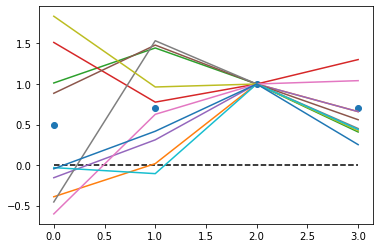

In [4]:
print("Now let's work in higher dimensions!")

mean = np.array([0,0,0,0])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])
sample = multivariate_normal(mean, cov, sample_shape)
print("Mean:\n{}.\n\nCovariance:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))
show(mean, sample)

def add_condition(mean, cov, pos, value):
    cov_11 = np.concatenate([cov[:pos], cov[pos+1:]])
    cov_11 = np.delete(cov_11, pos, 1)    
    cov_12 = np.expand_dims(np.append(cov[:pos,pos], cov[pos+1:,pos]),1)
    cov_21 = np.transpose(cov_12)
    cov_22 = np.array([cov[pos,pos]])
    cov_22_invert = 1 / cov_22

    mean = [mean[i] for i in range(len(mean)) if i != pos] + \
        (cov_12 @ cov_22_invert) * (value - mean[pos])
    cov = cov_11 - (np.expand_dims(cov_12 @ cov_22_invert, 1) @ cov_21)
    return(mean, cov)

pos = 2
value = 1
print("\nWhat if variable {} is {}?".format(pos+1, value))

mean, cov = add_condition(mean, cov, pos, value)
sample = multivariate_normal(mean, cov, sample_shape)
print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))

mean, sample = fix_mean_and_sample(mean, sample, pos, value)
show(mean, sample)

We can add multiple conditions!

What if {2: 1, 1: 1}?

Mean after:
[0.70588235 0.70588235].

Cov after:
[[ 0.50980392 -0.05686275]
 [-0.05686275  0.50980392]].

Samples:
[[ 6.82553925e-01  9.44686973e-01]
 [ 2.39047221e+00  4.27687998e-01]
 [ 6.66519706e-01  1.43739716e+00]
 [ 7.33785869e-01  8.82611895e-01]
 [ 1.11504562e+00 -2.68196463e-02]
 [ 2.55671187e-01  6.49609810e-01]
 [ 9.74040077e-01  1.26475997e-04]
 [ 1.44627817e+00  1.06828908e+00]
 [ 4.46641007e-02  1.06531853e+00]
 [ 1.55424524e-01  4.61480977e-01]].


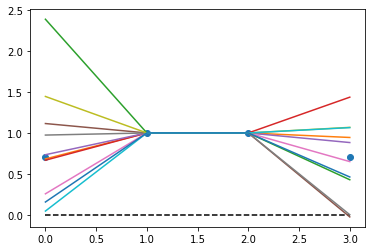

In [5]:
print("We can add multiple conditions!")

def add_conditions(mean, cov, pos_value_dict):
    pos_value_dict = deepcopy(pos_value_dict)
    if(len(pos_value_dict) == 1):
        for pos, value in pos_value_dict.items():
            return(add_condition(mean, cov, pos, value))
    else:
        pos = max(k for k, v in pos_value_dict.items())
        value = pos_value_dict[pos]
        mean, cov = add_condition(mean, cov, pos, value)
        del pos_value_dict[pos]
        return(add_conditions(mean, cov, pos_value_dict))

mean = np.array([0,0,0,0])
cov = np.array(
    [
     [1, .7, .5, .3],
     [.7, 1, .7, .5],
     [.5, .7, 1, .7],
     [.3, .5, .7, 1]
     ])

pos_value_dict = {
    2 : 1,
    1 : 1
}
print("\nWhat if {}?".format(pos_value_dict))

mean, cov = add_conditions(mean, cov, pos_value_dict)
sample = multivariate_normal(mean, cov, sample_shape)
print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))

mean, sample = fix_multiple(mean, sample, pos_value_dict)
show(mean, sample)

Mean:
[0 0 0 0 0 0 0 0 0 0].

Covariance:
[[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2]
 [0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3]
 [0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4]
 [0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5]
 [0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7 0.6]
 [0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8 0.7]
 [0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9 0.8]
 [0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  0.9]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]].

Samples:
[[ 0.19839205  0.39483581 -0.20525523  0.56426038 -0.1170544   0.9108992
   0.46418149  0.61629557  0.81115128  0.79790762]
 [ 0.00443599  0.22303884  0.16330203  0.15781696 -0.81975359 -0.90617474
  -1.30969186 -1.08117594 -1.02077043 -0.5142339 ]
 [-0.16949755  0.22942824  0.24356856 -0.13637511 -0.28417344  0.13841277
   0.21918397  0.39703675  0.14947596 -0.57917272]
 [-0.8426097  -1.24533279 -0.88440161 -1.13967625 -0.4735313  -0.84663265
  -0.64741336  0.11020714  1.08588637  1.02975442]
 [ 0.69740037  0.

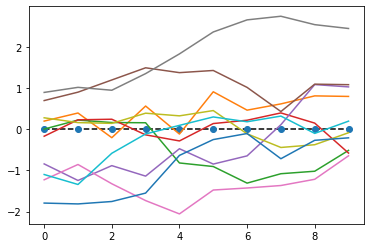

In [6]:
mean = np.array([0] * 10)
cov = np.array(
    [
        [1, .9, .8, .7, .6, .5, .4, .3, .2, .1],
        [.9, 1, .9, .8, .7, .6, .5, .4, .3, .2],
        [.8, .9, 1, .9, .8, .7, .6, .5, .4, .3],
        [.7, .8, .9, 1, .9, .8, .7, .6, .5, .4],
        [.6, .7, .8, .9, 1, .9, .8, .7, .6, .5],
        [.5, .6, .7, .8, .9, 1, .9, .8, .7, .6],
        [.4, .5, .6, .7, .8, .9, 1, .9, .8, .7],
        [.3, .4, .5, .6, .7, .8, .9, 1, .9, .8],
        [.2, .3, .4, .5, .6, .7, .8, .9, 1, .9],
        [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],

     ])
sample = multivariate_normal(mean, cov, sample_shape)
print("Mean:\n{}.\n\nCovariance:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))
show(mean, sample)


What if {1: 1, 8: -1}?

Mean after:
[ 1.          0.71428571  0.42857143  0.14285714 -0.14285714 -0.42857143
 -0.71428571 -1.        ].

Cov after:
[[ 1.84615385e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.77555756e-17 -1.53846154e-02]
 [ 0.00000000e+00  1.71428571e-01  1.42857143e-01  1.14285714e-01
   8.57142857e-02  5.71428571e-02  2.85714286e-02 -4.85722573e-17]
 [ 0.00000000e+00  1.42857143e-01  2.85714286e-01  2.28571429e-01
   1.71428571e-01  1.14285714e-01  5.71428571e-02  6.93889390e-18]
 [-5.55111512e-17  1.14285714e-01  2.28571429e-01  3.42857143e-01
   2.57142857e-01  1.71428571e-01  8.57142857e-02 -3.46944695e-17]
 [ 0.00000000e+00  8.57142857e-02  1.71428571e-01  2.57142857e-01
   3.42857143e-01  2.28571429e-01  1.14285714e-01 -2.42861287e-17]
 [-2.77555756e-17  5.71428571e-02  1.14285714e-01  1.71428571e-01
   2.28571429e-01  2.85714286e-01  1.42857143e-01 -1.28369537e-16]
 [-4.16333634e-17  2.85714286e-02  5.71428571e-02  8.

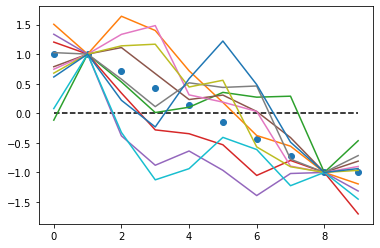

In [7]:
mean = np.array([0] * 10)
cov = np.array(
    [
        [1, .9, .8, .7, .6, .5, .4, .3, .2, .1],
        [.9, 1, .9, .8, .7, .6, .5, .4, .3, .2],
        [.8, .9, 1, .9, .8, .7, .6, .5, .4, .3],
        [.7, .8, .9, 1, .9, .8, .7, .6, .5, .4],
        [.6, .7, .8, .9, 1, .9, .8, .7, .6, .5],
        [.5, .6, .7, .8, .9, 1, .9, .8, .7, .6],
        [.4, .5, .6, .7, .8, .9, 1, .9, .8, .7],
        [.3, .4, .5, .6, .7, .8, .9, 1, .9, .8],
        [.2, .3, .4, .5, .6, .7, .8, .9, 1, .9],
        [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],

     ])
pos_value_dict = {
    1 : 1,
    8 : -1,
}
print("\nWhat if {}?".format(pos_value_dict))

mean, cov = add_conditions(mean, cov, pos_value_dict)
sample = multivariate_normal(mean, cov, sample_shape)
print("\nMean after:\n{}.\n\nCov after:\n{}.\n\nSamples:\n{}.".format(mean, cov, sample))

mean, sample = fix_multiple(mean, sample, pos_value_dict)
show(mean, sample)